In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from collections import defaultdict
import os
import glob

In [56]:
files = glob.glob('NORP*Fst.tsv')

In [57]:
print(files)

['NORP163_T1-T0.Fst.tsv', 'NORP139_T6-T2.Fst.tsv', 'NORP139_T4-T1.Fst.tsv', 'NORP147_T4-T3.Fst.tsv', 'NORP83_T3-T6.Fst.tsv', 'NORP147_T1-T3.Fst.tsv', 'NORP139_T5-T6.Fst.tsv', 'NORP163_T1-T8.Fst.tsv', 'NORP163_T0-T7.Fst.tsv', 'NORP83_T1-T4.Fst.tsv', 'NORP169_T2-T6.Fst.tsv', 'NORP169_T6-T1.Fst.tsv', 'NORP139_T4-T2.Fst.tsv', 'NORP83_T1-T6.Fst.tsv', 'NORP246_T4-T3.Fst.tsv', 'NORP246_T1-T3.Fst.tsv', 'NORP83_T4-T6.Fst.tsv', 'NORP163_T1-T2.Fst.tsv', 'NORP139_T1-T2.Fst.tsv', 'NORP163_T0-T8.Fst.tsv', 'NORP139_T4-T6.Fst.tsv', 'NORP163_T1-T7.Fst.tsv', 'NORP83_T4-T3.Fst.tsv', 'NORP83_T1-T3.Fst.tsv', 'NORP169_T2-T1.Fst.tsv', 'NORP163_T7-T2.Fst.tsv', 'NORP139_T5-T1.Fst.tsv', 'NORP139_T1-T6.Fst.tsv', 'NORP147_T1-T4.Fst.tsv', 'NORP163_T2-T8.Fst.tsv', 'NORP163_T0-T2.Fst.tsv', 'NORP139_T4-T5.Fst.tsv', 'NORP139_T5-T2.Fst.tsv', 'NORP163_T7-T8.Fst.tsv', 'NORP246_T1-T4.Fst.tsv']


In [68]:
heatmap = defaultdict(list)
for f in files:
    data = pd.read_table(f)
    genome = f.split("_")[0]
    tp1 = f.split("_")[1].split("-")[0]
    tp2 = f.split("_")[1].split("-")[1].split(".")[0]
    heatmap['genome'].append(genome)
    heatmap['timepoints'].append(tp1 + ":" + tp2)
    heatmap['fst'].append(round(data['fst'].mean(),3))

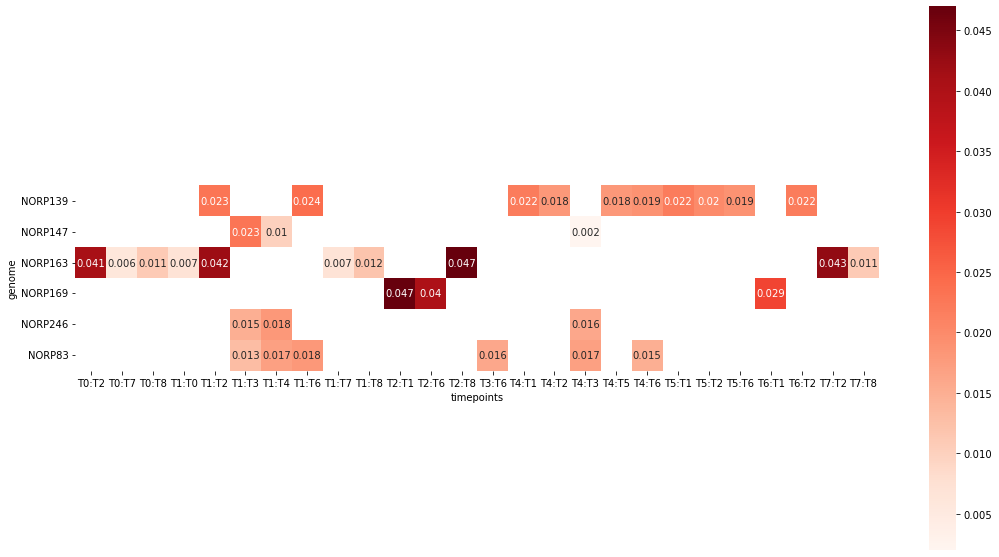

In [72]:
heatmap_data = pd.DataFrame(heatmap).pivot(index='genome', columns='timepoints', values='fst')
plt.figure(figsize = (18,10))
g = sns.heatmap(heatmap_data, square=True, annot=True, cmap="Reds")
#g = sns.heatmap(heatmap_data, square=True, annot=True, cmap="Reds", vmax=0.55)
g.set_facecolor('white')
#g.invert_yaxis()
plt.savefig('fst_heatmap.pdf')


70.24077065280925
20
101.47694416492442
20


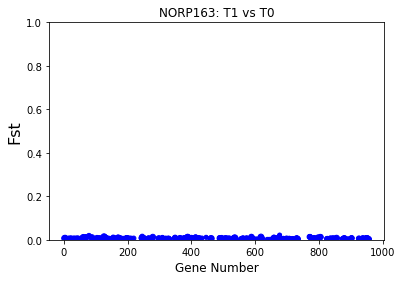

41.81544149391517
20
24.4768481499691
20
19.777567320278475
20
19.4514379089492
20
65.8177658587405
20
111.80131925915325
20
50.623721356981264
20
60.39736161544582
21.86095806683519


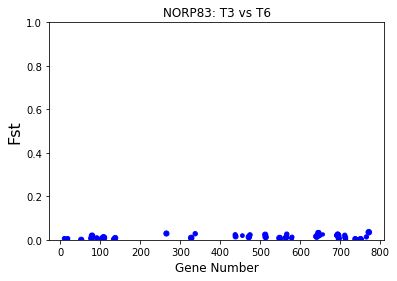

32.192708623677426
20
111.61329843237431
20
29.646440668292275
20
31.710156862550484
20
70.24077065280925
20
59.24951590105695
20


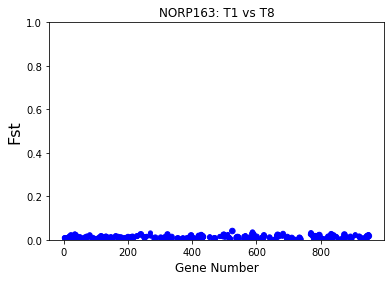

101.64414955879622
20
110.19241127274
20.790494320241997


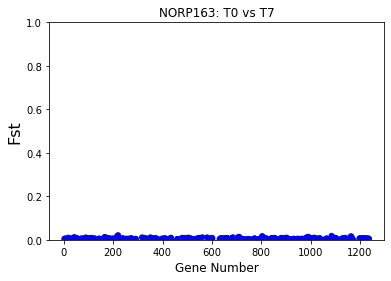

52.46679247468887
20
57.688364695868245
20


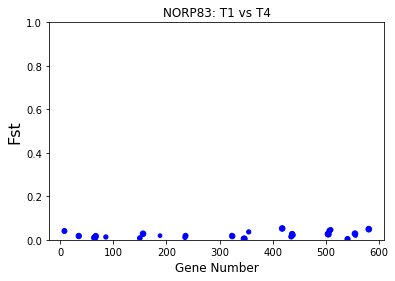

35.127024888139985
20
47.144732922456555
20


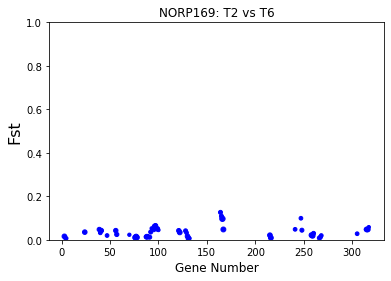

49.28149598740986
20
39.636060539515896
20


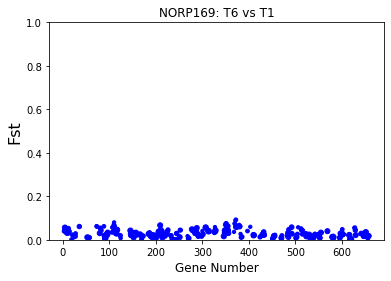

19.777567320278475
20
16.451106936043008
20
52.46679247468887
20
61.073249774750366
20


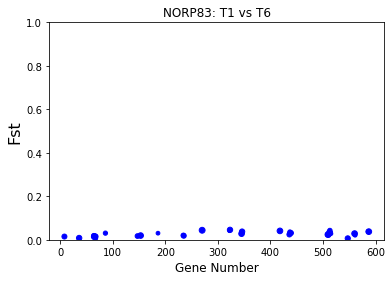

34.47306431462573
20
47.1653800232681
20


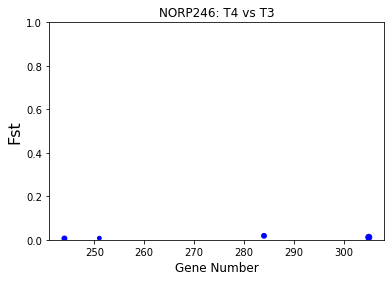

72.1457477267576
20
41.592489401829
20


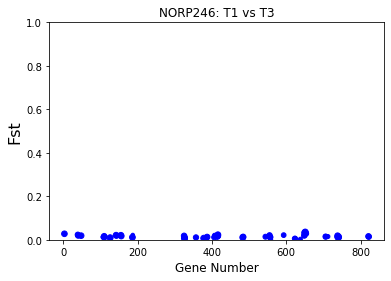

57.72651073705101
20
61.16007774794916
20


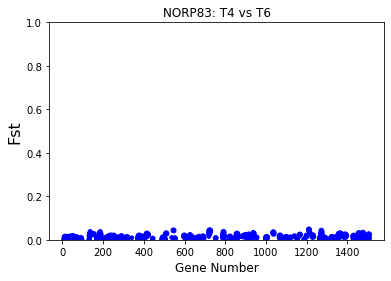

70.24077065280925
20
147.98510700231907
20


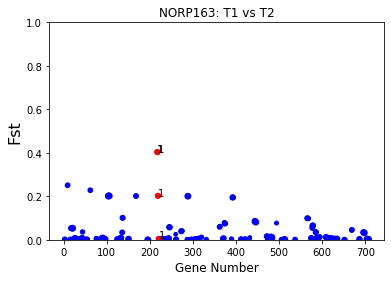

24.174275601444148
20
21.63731564936294
20
101.64414955879622
20
59.291692919342
20


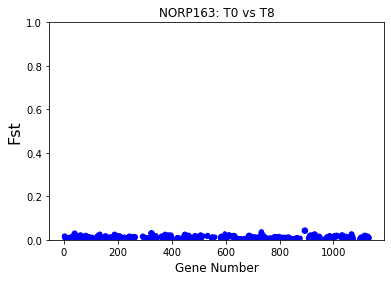

19.777567320278475
20
30.789122157299886
20
70.24077065280925
20
110.2496916210933
20.199102505090977


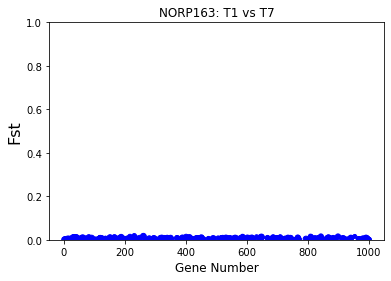

57.72651073705101
20
49.15075807863062
20


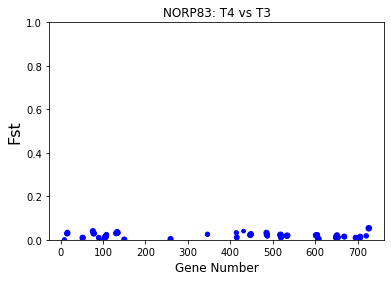

52.46679247468887
20
48.58939728808602
20


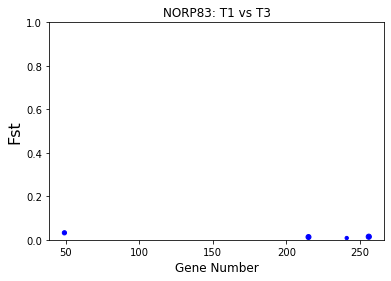

35.127024888139985
20
35.641862321837145
20


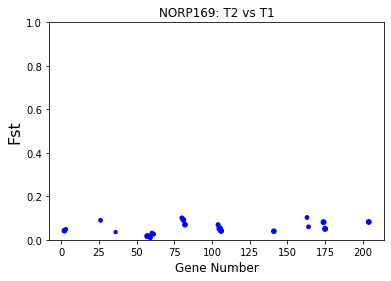

112.22676030072287
24.6264487121586
153.02832737928554
20


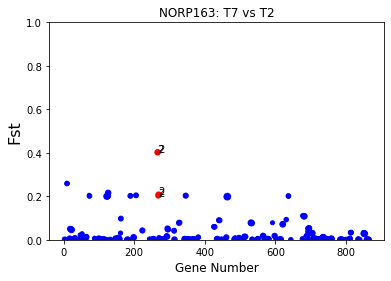

29.646440668292275
20
20.175824031819367
20
24.174275601444148
20
39.13015046436045
20
32.192708623677426
20
65.60188145653589
20
178.46049089626752
20
63.67430290328123
23.673584487637665


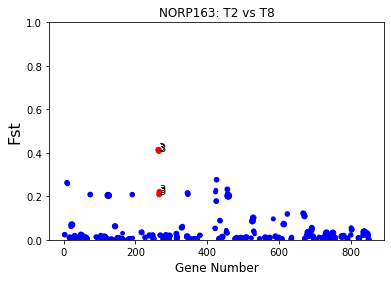

101.64414955879622
20
148.60022967535258
20


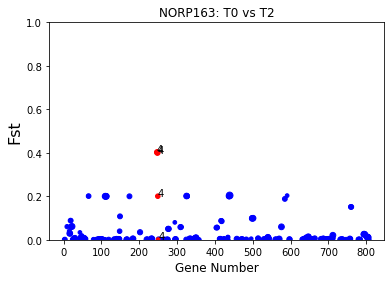

19.777567320278475
20
28.822756640749844
20
29.646440668292275
20
17.193220634900875
20
112.22676030072287
24.6264487121586
60.59977121702083
20


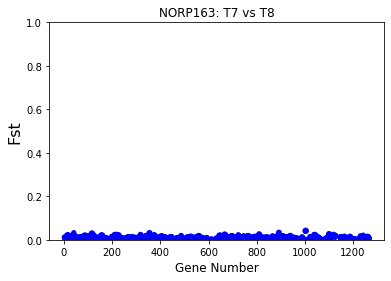

72.1457477267576
20
28.352076321218142
20


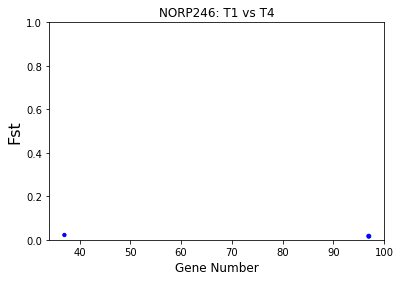

In [62]:
from collections import defaultdict #Code modified from https://github.com/alexcritschristoph/soil_popgen
loci_dictionary = defaultdict(int)
f_out = open('high_fst.data', 'w+')
for f in files:

    genome = genome_name = f.split("_")[0]
    tp1 = f.split("_")[1].split("-")[0]
    tp2 = f.split("_")[1].split("-")[1].split(".")[0]

    grouped = pd.read_table(f)
    
    for index, feature in grouped.iterrows():
        grouped.at[index,'scaffold'] = "_".join(feature['gene'].split("_")[:-1])
        grouped.at[index,'orf_num'] = int(feature['gene'].split("_")[-1])
    
    grouped_sort = grouped.sort_values(['scaffold', 'orf_num']).reset_index(drop=True)
    grouped_sort['size'] = np.log(grouped_sort['snp_num']) * 10

    ## FST and Coverage cutoffs
    #cutoff = np.mean(grouped_sort['fst']) + 2.5*np.std(grouped_sort['fst'])
    cutoff = np.mean(grouped_sort['fst']) + 2*np.std(grouped_sort['fst'])
    high_cov1 = np.mean(grouped_sort['cov_1']) + 2*np.std(grouped_sort['cov_1'])
    low_cov1 = np.mean(grouped_sort['cov_1']) - 2*np.std(grouped_sort['cov_1'])
    
    high_cov2 = np.mean(grouped_sort['cov_2']) + 2*np.std(grouped_sort['cov_2'])
    low_cov2 = np.mean(grouped_sort['cov_2']) - 2*np.std(grouped_sort['cov_2'])
    if low_cov1 < 20:
        low_cov1 = 20
    if low_cov2 < 20:
        low_cov2 = 20
    print(high_cov1)
    print(low_cov1)
    print(high_cov2)
    print(low_cov2)
    
    # Remove high and low coverage genes
    grouped_sort = grouped_sort[(grouped_sort.cov_1 <= high_cov1) & (grouped_sort.cov_1 >= low_cov1) & \
                                (grouped_sort.cov_2 <= high_cov2) & (grouped_sort.cov_2 >= low_cov2) ]
    grouped_sort = grouped_sort.reset_index(drop=True)
    grouped_sort.at[0,'category'] = 'All'

    found_genes = set()
    gene_fst_avgs = defaultdict(lambda:-1)

    for scaffold in grouped_sort.scaffold.unique():
        scaffold_sort = grouped_sort[grouped_sort.scaffold == scaffold]
        scaffold_sort = scaffold_sort.sort_values(['orf_num']).reset_index(drop=True)
        for index, feature in scaffold_sort.iterrows():
            ##ASSESSES a mean Fst for target gene minus 2 through plus 3 genes - 5 GENE BLOCKS
            if index-2 >= 0 and index+3 <= scaffold_sort.shape[0]-1:
                gene_fst_avgs[scaffold_sort['gene'][index]]  = np.mean(scaffold_sort['fst'][index-2:index+3])
                if np.mean(scaffold_sort['fst'][index-2:index+3]) >= cutoff:
                    for i2 in range(index-2, index+3): 
                        if scaffold_sort['gene'][i2] not in found_genes:
                            found_genes.add(scaffold_sort['gene'][i2])
            ##ASSESSES a mean Fst for target gene minus 1 through plus 2 genes - 3 GENE BLOCKS
            #if index-1 >= 0 and index+2 <= scaffold_sort.shape[0]-1:
            #    gene_fst_avgs[scaffold_sort['gene'][index]]  = np.mean(scaffold_sort['fst'][index-1:index+2])
            #    if np.mean(scaffold_sort['fst'][index-1:index+2]) >= cutoff:
            #       for i2 in range(index-1, index+2): 
            #            if scaffold_sort['gene'][i2] not in found_genes:
            #                found_genes.add(scaffold_sort['gene'][i2])

    fst_loci_count = 1
    grouped_sort["loci_num"] = 0
    grouped_sort["fst_avg"] = None
    for index, feature in grouped_sort.iterrows():
        if gene_fst_avgs[feature['gene']] != -1:
            grouped_sort.at[index, 'fst_avg'] = gene_fst_avgs[feature['gene']]

        if feature['gene'] in found_genes:
            grouped_sort.at[index,'category'] = 'Fst'
            if index != 0:
                if grouped_sort['scaffold'][index-1] == feature['scaffold'] and grouped_sort['loci_num'][index-1] != 0:
                    grouped_sort.at[index, 'loci_num'] = loci_dictionary[genome_name]
                else:
                    loci_dictionary[genome_name] += 1
                    grouped_sort.at[index, 'loci_num'] = loci_dictionary[genome_name]
        else:
            grouped_sort.at[index,'category'] = 'All'
            grouped_sort.at[index, 'loci_num'] = 0

    # print results
    for index, feature in grouped_sort.iterrows():
        if feature['loci_num'] != 0:
            f_out.write(feature['gene'] + "\t" + str(feature['loci_num']) + "\t" + genome_name + "\t" + tp1 + "\t" + tp2 + "\n")
    a = grouped_sort[grouped_sort.category == 'All']['fst']
    b = grouped_sort[grouped_sort.category == 'Fst']['fst']
    all_plot = grouped_sort[grouped_sort.category == 'All']

    bgc_plot = grouped_sort[grouped_sort.category == 'Fst']
    
    if len(all_plot) > 100:
        fig, ax = plt.subplots()
        ax.scatter(all_plot.index, all_plot['fst_avg'], c='blue', s=all_plot['size'])
        ax.scatter(bgc_plot.index, bgc_plot['fst_avg'], c='red', s=bgc_plot['size'])

        for i, r2 in bgc_plot.iterrows():
            if int(r2['loci_num']) > 0 and r2['fst_avg'] != None:
                ax.annotate(int(r2['loci_num']), (i, r2['fst_avg']))

        plt.title(genome + ": " + tp1 + " vs " + tp2)
        plt.ylim(0, 1)
        plt.xlabel('Gene Number', fontsize=12)
        plt.ylabel('Fst', fontsize=16)

        try:
            plt.savefig(genome + "-" + tp1 + "vs" + tp2 +"_fst.png", bbox_inches='tight', dpi=300)
            plt.show()
        except ValueError:
            continue
        plt.close()
f_out.close()